# Spotify Project Notebook 3

**Authors:** Brian Karstens and Christian Kleronomos  
**Last Modified:** 12-16-2024 (created: 11-17-2024)

**Description:** This is the final notebook to be run.  The code in this notebook reads in the cleaned dataframe from the "01" notebook and analyzes the data to generate graphs and other answers related to Spotify.

<br>

Import Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

In [2]:
spotify = pd.read_csv('final_song_clean.csv', encoding='utf-8')
display(spotify)

,title,artist,top_genre,year_released,added,bpm,nrgy,dnce,dB,live,...,dur,acous,spch,pop,top_year,artist_type,pop_today,track_id,url,streams
0,#SELFIE,The Chainsmokers,dance pop,2014,2020‑06‑10,128,92,79,-3,8,...,184,1,25,69,2014,Duo,60,1HOlb9rdNOmy9b1Fakicjo,https://open.spotify.com/track/1HOlb9rdNOmy9b1...,2.550158e+08
1,#thatPOWER,will.i.am,dance pop,2013,2020‑06‑11,128,61,80,-6,7,...,280,0,6,74,2013,Solo,64,01TuObJVd7owWchVRuQbQw,https://open.spotify.com/track/01TuObJVd7owWch...,2.702103e+08
2,...Ready For It?,Taylor Swift,pop,2017,2021‑01‑28,160,76,61,-7,20,...,208,5,14,78,2017,Solo,79,2yLa0QULdQr0qAIvVwN6B5,https://open.spotify.com/track/2yLa0QULdQr0qAI...,8.273435e+08
3,1-800-273-8255,Logic,conscious hip hop,2017,2021‑01‑28,100,57,62,-8,19,...,250,57,5,82,2017,Solo,73,5tz69p7tJuGPeMGwNTxYuV,https://open.spotify.com/track/5tz69p7tJuGPeMG...,1.372950e+09
4,17,MK,dance pop,2017,2020‑06‑22,122,83,70,-7,7,...,196,0,7,69,2018,Solo,59,15DwFznkBJir7AK9PyMyRR,https://open.spotify.com/track/15DwFznkBJir7AK...,2.246597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,oui,Jeremih,chicago rap,2015,2020‑06‑19,79,72,42,-4,11,...,238,21,10,82,2015,Solo,73,0PJIbOdMs3bd5AT8liULMQ,https://open.spotify.com/track/0PJIbOdMs3bd5AT...,7.142965e+08
900,rockstar (feat. 21 Savage),Post Malone,dfw rap,2018,2020‑06‑22,160,52,59,-6,13,...,218,12,7,87,2018,Solo,80,0e7ipj03S05BNilyu5bRzt,https://open.spotify.com/track/0e7ipj03S05BNil...,3.079637e+09
901,"thank u, next",Ariana Grande,dance pop,2019,2020‑06‑22,107,65,72,-6,10,...,207,23,7,85,2019,Solo,78,3e9HZxeyfWwjeyPAMmWSSQ,https://open.spotify.com/track/3e9HZxeyfWwjeyP...,1.964330e+09
902,we fell in love in october,girl in red,bedroom pop,2018,2021‑03‑02,130,37,57,-13,16,...,184,11,3,88,2018,Solo,86,6IPwKM3fUUzlElbvKw2sKl,https://open.spotify.com/track/6IPwKM3fUUzlElb...,1.233205e+09


In [3]:
pd.set_option('display.float_format', '{:,.0f}'.format)

## How much does each genre appear in the top hits?

In [4]:
genre_counts = spotify['top_genre'].value_counts()
genre_counts = genre_counts.reset_index()
genre_counts.columns = ['top_genre', 'count']
print("Number of times each genre is present: ", "\n", "-"*100)
display(genre_counts)

Number of times each genre is present:  
 ----------------------------------------------------------------------------------------------------


,top_genre,count
0,dance pop,332
1,pop,55
2,art pop,33
3,atl hip hop,32
4,boy band,21
...,...,...
121,deep disco house,1
122,electro,1
123,hawaiian hip hop,1
124,dark clubbing,1


## What is the average danceability of songs in the top hits?

In [5]:
mean_danceability = spotify['dnce'].mean()
print(f"The average danceability is: {mean_danceability:.2f}")

The average danceability is: 66.77


## What is the average difference of popularity in songs from when they were added to today?

In [6]:
average_pop_difference = (spotify['pop_today'] - spotify['pop']).mean()
print(f"The average popularity difference between all songs: {average_pop_difference:.2f}, meaning songs are on average less popular today than when they were added.")

The average popularity difference between all songs: -6.88, meaning songs are on average less popular today than when they were added.


## Are there any songs with higher popularity today than when they were added to the top hits?
- What is the average popularity difference for these songs?

In [7]:
popularity_comparison = spotify[spotify['pop'] < spotify['pop_today']]
print('Songs with higher popularity scores today than when added to the top hits')
print('-'*100)
display(popularity_comparison[['title','artist','pop','pop_today']])

Songs with higher popularity scores today than when added to the top hits
----------------------------------------------------------------------------------------------------


,title,artist,pop,pop_today
2,...Ready For It?,Taylor Swift,78,79
6,2 On (feat. ScHoolboy Q),Tinashe,77,79
29,"All I Do Is Win (feat. T-Pain, Ludacris, Snoop...",DJ Khaled,55,67
55,BUTTERFLY EFFECT,Travis Scott,81,83
63,Bad Blood,Taylor Swift,60,64
74,Beauty And A Beat,Justin Bieber,78,80
98,Blurred Lines,Robin Thicke,61,73
107,Born To Die,Lana Del Rey,62,66
112,Boyfriend,Justin Bieber,68,74
133,Chameleon,PNAU,48,51


### What is the average difference for these songs? 

In [8]:
popularity_difference_more_pop = spotify[spotify['pop'] < spotify['pop_today']].apply(lambda row: row['pop_today'] - row['pop'], axis=1)
average_difference = popularity_difference_more_pop.mean()
print(f"The average value songs are more popular by today: {average_difference:.2f}")

The average value songs are more popular by today: 3.93


## Who are the 5 most dominant artists of 2010-2019?
- How many times do they appear?
- What is the total number of streams they have in this data?

In [9]:
songs_count_by_artist = spotify.groupby('artist').size()

total_streams_by_artist = spotify.groupby('artist')['streams'].sum()

artist_data = pd.DataFrame({
    'song_count': songs_count_by_artist,
    'total_streams': total_streams_by_artist
})

artist_data_sorted = artist_data.sort_values(by='song_count', ascending=False)

top_5_artists = artist_data_sorted.head(5)

display(top_5_artists)

,song_count,total_streams
artist,,
Taylor Swift,19,"18,535,748,731"
Drake,18,"18,086,706,098"
Calvin Harris,17,"14,903,390,535"
Ariana Grande,13,"16,376,508,155"
Rihanna,12,"11,961,810,414"


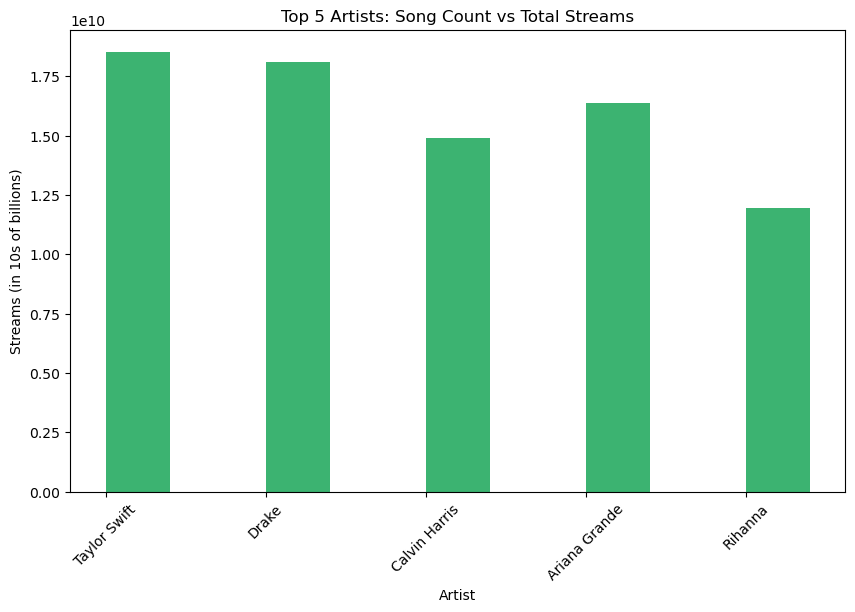

In [10]:
plt.figure(figsize=(10, 6))

x = np.arange(len(top_5_artists)) 
width = 0.4 

plt.bar(x + width/2, top_5_artists['total_streams'], width=width, color='mediumseagreen', label='Total Streams')

plt.title('Top 5 Artists: Song Count vs Total Streams')
plt.xlabel('Artist')
plt.ylabel('Streams (in 10s of billions)')
plt.xticks(x, top_5_artists.index, rotation=45)

plt.show()

## Do songs in the first half of the decade have more or less streams than those released in the second half?

In [11]:
midpoint_year = 2015

first_half_decade = spotify[spotify['year_released'] < midpoint_year]
second_half_decade = spotify[spotify['year_released'] >= midpoint_year]

total_streams_first_half = first_half_decade['streams'].sum()
total_streams_second_half = second_half_decade['streams'].sum()

total_streams_first_half_int = int(total_streams_first_half)
total_streams_second_half_int = int(total_streams_second_half)

formatted_first_half = "{:,.0f}".format(total_streams_first_half_int)
formatted_second_half = "{:,.0f}".format(total_streams_second_half_int)

print("Total streams in the first half of the decade:", formatted_first_half)
print("Total streams in the second half of the decade:", formatted_second_half)

if formatted_first_half > formatted_second_half:
    print(f"Songs in the first half of the decade had more streams: {formatted_first_half}")
else: 
    print(f"Songs in the second half of the decade had more streams: {formatted_second_half}")

Total streams in the first half of the decade: 304,257,532,108
Total streams in the second half of the decade: 463,600,195,928
Songs in the second half of the decade had more streams: 463,600,195,928


## What is the average duration of songs in the data?  Min? Max? Median?

In [12]:
average_duration = spotify['dur'].mean()
min_duration = spotify['dur'].min()
max_duration = spotify['dur'].max()
median_duration = spotify['dur'].median()

print(f"Average duration: {average_duration:.2f} seconds")
print(f"Minimum duration: {min_duration:.2f} seconds")
print(f"Maximum duration: {max_duration:.2f} seconds")
print(f"Median duration: {median_duration:.2f} seconds")

Average duration: 220.83 seconds
Minimum duration: 115.00 seconds
Maximum duration: 688.00 seconds
Median duration: 216.00 seconds


## Were there multiple songs added to the top hits playlist in the same day?  Which day had the most?

In [13]:
songs_per_day = spotify['added'].value_counts()

most_songs_day = songs_per_day.idxmax()
most_songs_count = songs_per_day.max()

multiple_added_days = songs_per_day[songs_per_day > 1]

print(f"The day with the most songs added: {most_songs_day} with {most_songs_count} songs.")
print("\n")
print(f"Days with multiple songs added: \n{multiple_added_days}")

The day with the most songs added: 2020‑06‑22 with 251 songs.


Days with multiple songs added: 
added
2020‑06‑22    251
2022‑02‑17     94
2020‑06‑11     89
2021‑01‑28     88
2020‑06‑16     87
2020‑06‑10     85
2020‑06‑08     77
2020‑06‑19     73
2021‑08‑09     14
2021‑08‑17      9
2021‑06‑25      6
2020‑06‑25      5
2020‑08‑11      4
2020‑08‑20      4
2021‑06‑15      4
2020‑06‑29      4
2022‑01‑24      2
Name: count, dtype: int64


## Of songs with popularity > 80 from 2010-2019, what % have a danceability > 80?

In [14]:
pop_dance_2010_2019 = spotify[(spotify['year_released'] >= 2010) & 
                               (spotify['year_released'] <= 2019) & 
                               (spotify['pop'] > 80)]

danceable_songs = pop_dance_2010_2019[pop_dance_2010_2019['dnce'] > 80]

percentage_danceable = (len(danceable_songs) / len(pop_dance_2010_2019)) * 100

print(f"Percentage of songs with popularity > 80 and danceability > 80: {percentage_danceable:.2f}%")

Percentage of songs with popularity > 80 and danceability > 80: 15.81%


## Using a graph, is there correlation between beats per minute and danceability? Streams and Danceability? Current day popularity and streams?

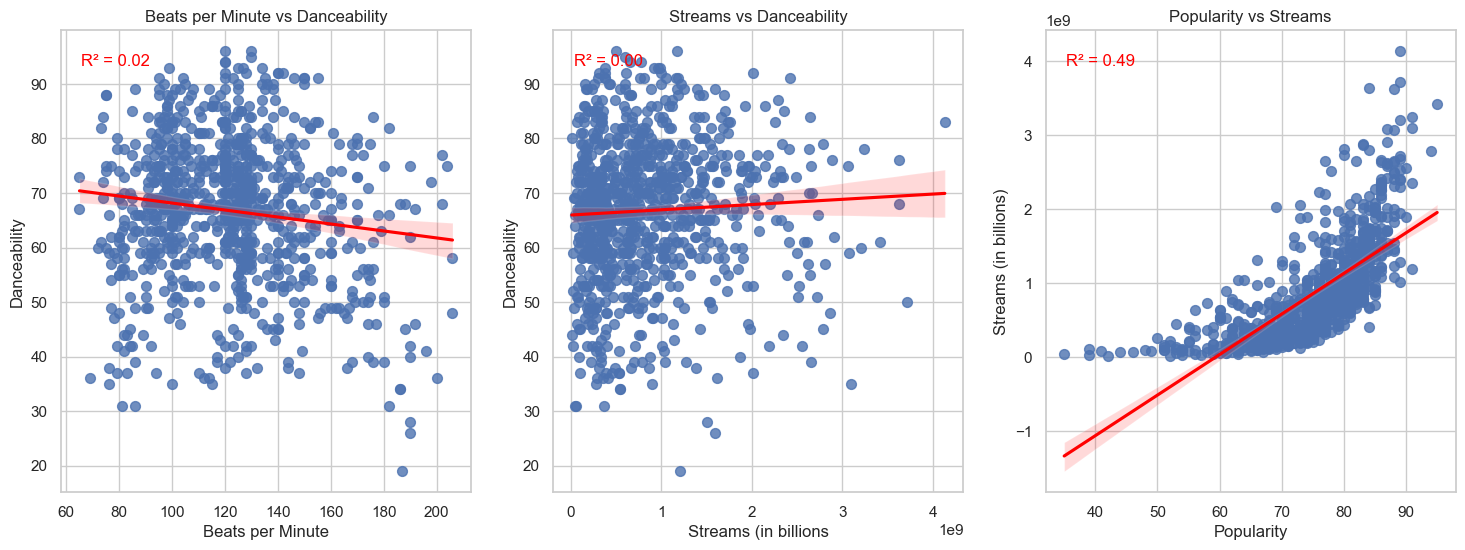

In [15]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

def annotate_r_value(ax, x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    r_squared = r_value ** 2
    
    ax.text(0.05, 0.95, f'R² = {r_squared:.2f}', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', horizontalalignment='left', color='red')

sns.regplot(x='bpm', y='dnce', data=spotify, ax=axes[0], scatter_kws={'s': 50}, line_kws={'color': 'red'})
axes[0].set_title('Beats per Minute vs Danceability')
axes[0].set_xlabel('Beats per Minute')
axes[0].set_ylabel('Danceability')
annotate_r_value(axes[0], spotify['bpm'], spotify['dnce'])

sns.regplot(x='streams', y='dnce', data=spotify, ax=axes[1], scatter_kws={'s': 50}, line_kws={'color': 'red'})
axes[1].set_title('Streams vs Danceability')
axes[1].set_xlabel('Streams (in billions')
axes[1].set_ylabel('Danceability')
annotate_r_value(axes[1], spotify['streams'], spotify['dnce'])

sns.regplot(x='pop', y='streams', data=spotify, ax=axes[2], scatter_kws={'s': 50}, line_kws={'color': 'red'})
axes[2].set_title('Popularity vs Streams')
axes[2].set_xlabel('Popularity')
axes[2].set_ylabel('Streams (in billions)')
annotate_r_value(axes[2], spotify['pop'], spotify['streams'])

plt.show()

## Did songs have a higher danceability score in the first half of the decade or second? popularity?  

In [16]:
first_half_decade = spotify[(spotify['year_released'] >= 2010) & (spotify['year_released'] <= 2014)]
second_half_decade = spotify[(spotify['year_released'] >= 2015) & (spotify['year_released'] <= 2019)]

first_half_avg_danceability = first_half_decade['dnce'].mean()
second_half_avg_danceability = second_half_decade['dnce'].mean()

first_half_avg_popularity = first_half_decade['pop'].mean()
second_half_avg_popularity = second_half_decade['pop'].mean()

print(f"Average Danceability (2010-2014): {first_half_avg_danceability:.2f}")
print(f"Average Danceability (2015-2019): {second_half_avg_danceability:.2f}")
print(f"Average Popularity (2010-2014): {first_half_avg_popularity:.2f}")
print(f"Average Popularity (2015-2019): {second_half_avg_popularity:.2f}")

if first_half_avg_danceability > second_half_avg_danceability:
    print(f"Songs in the first half of the decade had a higher danceability score: {first_half_avg_danceability:.2f}")
else:
    print(f"Songs in the second half of the decade had a higher danceability score: {second_half_avg_danceability:.2f}")

if first_half_avg_popularity > second_half_avg_popularity:
    print(f"Songs in the first half of the decade had a higher popularity score: {first_half_avg_popularity:.2f}")
else:
    print(f"Songs in the second half of the decade had a higher popularity score: {second_half_avg_popularity:.2f}")

Average Danceability (2010-2014): 64.23
Average Danceability (2015-2019): 69.34
Average Popularity (2010-2014): 73.41
Average Popularity (2015-2019): 76.69
Songs in the second half of the decade had a higher danceability score: 69.34
Songs in the second half of the decade had a higher popularity score: 76.69


## What artist type is the most popular for songs in this data?

In [17]:
artist_type_counts = spotify['artist_type'].value_counts()
display(artist_type_counts)

artist_type
Solo          676
Band/Group    156
Duo            60
Trio           12
Name: count, dtype: int64

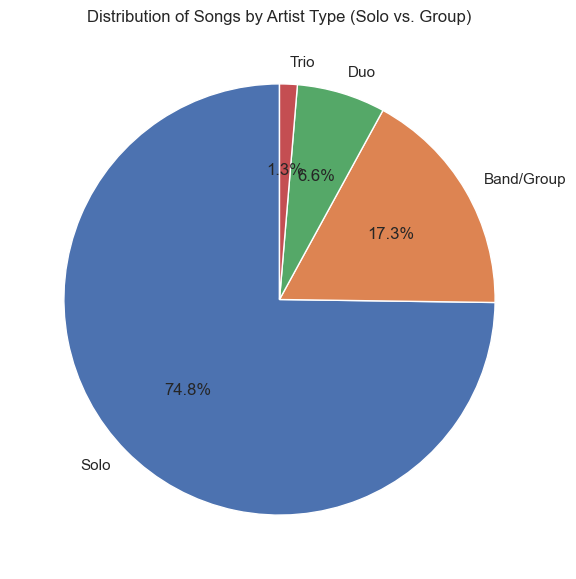

In [18]:
plt.figure(figsize=(7, 7))
plt.pie(artist_type_counts, labels=artist_type_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Songs by Artist Type (Solo vs. Group)')

plt.show()

## Are there many outliers in the number of streams a specific song has?

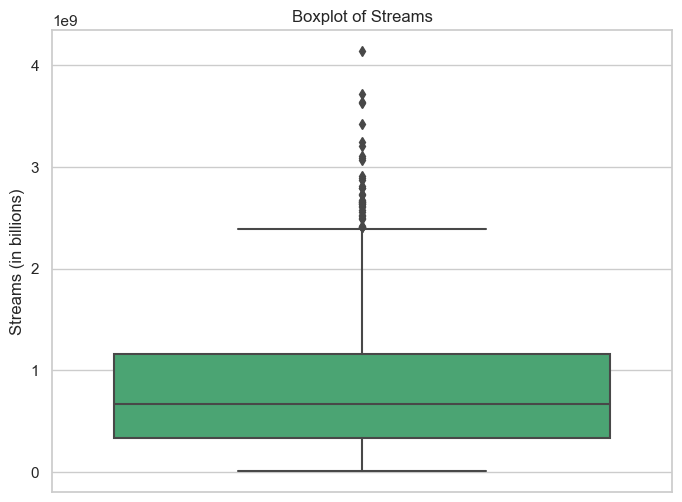

In [19]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(data=spotify, y='streams', color='mediumseagreen')

plt.title('Boxplot of Streams')
plt.ylabel('Streams (in billions)')

plt.show()

## What is the distribution of Beats Per Minute in songs?

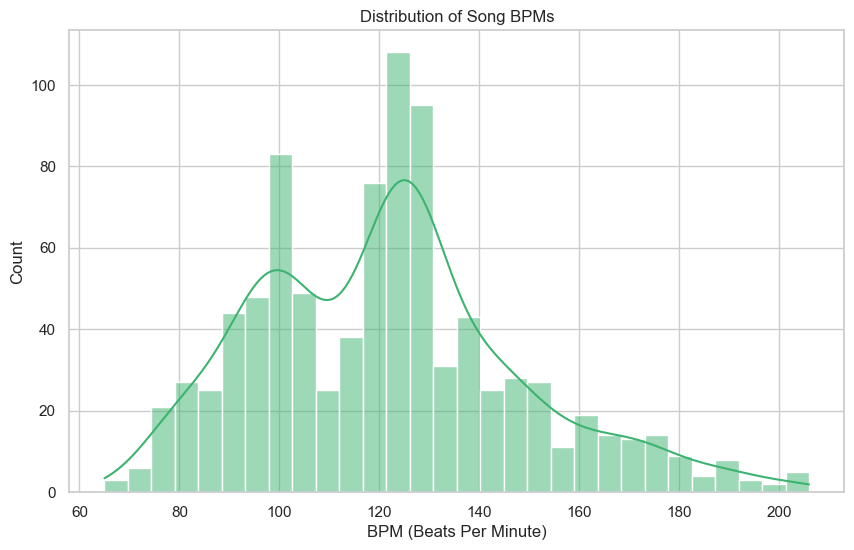

In [20]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=spotify, x='bpm', bins=30, kde=True, color='mediumseagreen')

plt.title('Distribution of Song BPMs')
plt.xlabel('BPM (Beats Per Minute)')
plt.ylabel('Count')

plt.show()

## What are the most popular genres by total streams?

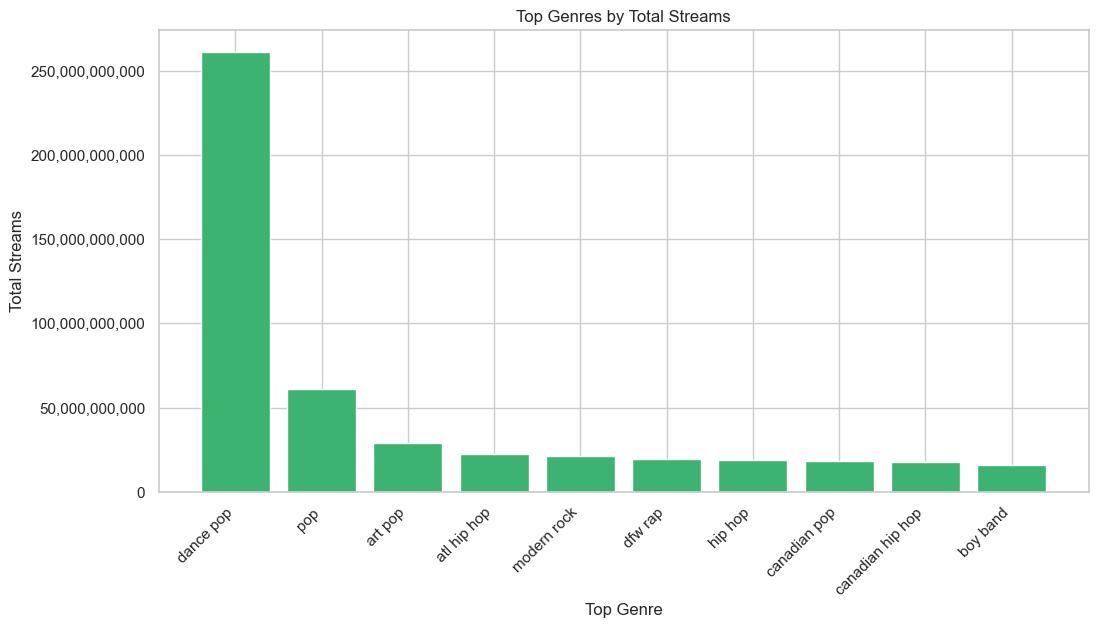

In [21]:
top_genres = spotify.groupby('top_genre')['streams'].sum().reset_index()

top_genres_sorted = top_genres.sort_values(by='streams', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_genres_sorted['top_genre'], top_genres_sorted['streams'], color='mediumseagreen')

plt.title('Top Genres by Total Streams')
plt.xlabel('Top Genre')
plt.ylabel('Total Streams')
plt.xticks(rotation=45, ha='right')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.show()